In [2]:
from statsbombpy import sb
import math
import pandas as pd
from pandasql import sqldf
import requests
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [3]:
columns = [
    'id',
    'match_id',
    'index',
    'minute',
    'second',
    'possession',
    'possession_team_id',
    'possession_team',
    'type',
    'player_id',
    'player',
    'position',
    'team_id',
    'team',
    'location',
    'pass_end_location',
    'pass_outcome',
    'ball_receipt_outcome',
    'pass_recipient_id',
    'pass_recipient',
    'carry_end_location',
    'dribble_outcome',
    'foul_won_advantage',
    'related_events',
    'under_pressure'
]

events = sb.competition_events(
    country="England",
    division= "FA Women's Super League",
    season="2020/2021",
    gender="female"
)[columns]

# events = events[events.match_id.isin([3890305, 3890561, 3890511, 3890515, 3890263, 3890261])] # For 1. Bundesliga

events.head()

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data acce

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,pass_end_location,pass_outcome,ball_receipt_outcome,pass_recipient_id,pass_recipient,carry_end_location,dribble_outcome,foul_won_advantage,related_events,under_pressure
0,f51b1630-d1a8-4837-97b0-de862f0e299a,3775648,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1bbead8d-7790-4898-a765-3cdffeaf966e,3775648,2,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,caa9cf6d-dd46-4bdc-ba4c-f6fc82cb9fa9,3775609,1,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f85b9236-3d19-476a-8304-57b74b6416b3,3775609,2,0,0,1,968,Arsenal WFC,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b7f68694-0261-4929-ad96-907e62ec630c,3775633,1,0,0,1,2647,Aston Villa,Starting XI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches = sb.matches(competition_id=37, season_id=90)[['match_id', 'competition', 'season', 'match_date', 'home_team', 'home_score', 'away_score', 'away_team']]

# matches = matches[matches.match_id.isin([3890305, 3890561, 3890511, 3890515, 3890263, 3890261])]

matches

/Users/prateek/miniconda3/envs/pass_reception_and_transition/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,competition,season,match_date,home_team,home_score,away_score,away_team
0,3775648,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,3775609,England - FA Women's Super League,2020/2021,2021-04-28,Arsenal WFC,2,0,West Ham United LFC
2,3775633,England - FA Women's Super League,2020/2021,2021-02-06,Aston Villa,1,0,Tottenham Hotspur Women
3,3775570,England - FA Women's Super League,2020/2021,2021-03-28,Brighton & Hove Albion WFC,0,5,Everton LFC
4,3775581,England - FA Women's Super League,2020/2021,2021-03-28,Chelsea FCW,2,0,Aston Villa
...,...,...,...,...,...,...,...,...
126,3775608,England - FA Women's Super League,2020/2021,2021-01-17,West Ham United LFC,0,1,Tottenham Hotspur Women
127,3775599,England - FA Women's Super League,2020/2021,2021-04-20,West Ham United LFC,0,0,Aston Villa
128,3775554,England - FA Women's Super League,2020/2021,2020-11-14,Everton LFC,1,1,Reading WFC
129,3775652,England - FA Women's Super League,2020/2021,2021-02-07,Chelsea FCW,1,2,Brighton & Hove Albion WFC


In [5]:
def pass_start_location(x):
    return events[events.id == list(filter(lambda x: events[events.id == x].type.item() == 'Pass', x))[0]].location.item()[0] < 60

In [6]:
ball_receipts = events[(events.type == 'Ball Receipt*') & (events.ball_receipt_outcome.isna()) & (events.position.str.contains('Midfield'))]
ball_receipts = ball_receipts[ball_receipts.location.apply(lambda x: 20 < x[0] < 60)]
ball_receipts = ball_receipts[ball_receipts.related_events.apply(pass_start_location)]
ball_receipts = pd.merge(left = ball_receipts, right = matches, how = 'left', on = 'match_id')

ball_receipts.head()

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,foul_won_advantage,related_events,under_pressure,competition,season,match_date,home_team,home_score,away_score,away_team
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[4467e274-205f-41be-ab7e-62ece2697dbc],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,NaN,[51af8ad7-5652-4717-9547-796fd8212fcf],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,NaN,[5cd79af7-7929-4b2b-a3a7-9d9f839db461],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,NaN,[6ebcfd9e-39ed-490b-a120-c8a92c1a1c44],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,NaN,[9674c1be-0675-499b-9328-82ec1f5fcc39],NaN,England - FA Women's Super League,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC


In [7]:
data = dict()
for receipt in ball_receipts.itertuples():
    event_dict = dict()
    event_count = 0
    final_location_x = receipt.location[0]
    players = set()
    dribble = False
    last_carry_start_location = receipt.location
    last_carry_distance = 0
    possession_events = events[(events.match_id == receipt.match_id) & (events.possession == receipt.possession) & (events['index'] > receipt.index)].sort_values('index')
    for event in possession_events.itertuples():
        if final_location_x >= 80 or event_count == 4 or len(players) == 2:
            break
        else:
            if event.type == 'Pass' and pd.isna(event.pass_outcome):
                event_count += 1
                final_location_x = event.pass_end_location[0]
                players.add(event.player_id)
            elif dribble == False and event.type == 'Carry':
                if math.dist(event.location, event.carry_end_location) > 5.46807:
                    event_count += 1
                final_location_x = event.carry_end_location[0]
                players.add(event.player_id)
                last_carry_start_location = event.location
                last_carry_distance = math.dist(event.location, event.carry_end_location)
            elif event.type in ['Dispossessed', 'Miscontrol', 'Interception', 'Clearance', 'Block', 'Shot'] \
            or (event.type == 'Pass' and pd.notna(event.pass_outcome)) \
            or (event.type == 'Dribble' and event.dribble_outcome == 'Incomplete') \
            or (event.type == 'Foul Won' and pd.isna(event.foul_won_advantage)):
                break
            elif event.type == 'Dribble' and event.dribble_outcome == 'Complete':
                dribble = True
            elif dribble == True and event.type == 'Carry':
                if last_carry_distance <= 5.46807 and math.dist(last_carry_start_location, event.carry_end_location) > 5.46807:
                    event_count += 1
                final_location_x = event.carry_end_location[0]
                dribble = False
                last_carry_distance = math.dist(last_carry_start_location, event.carry_end_location)
            else:
                continue
    event_dict['successful_transition'] = True if final_location_x >= 80 else False
    event_dict['transition_final_location_x'] = final_location_x
    event_dict['transition_event_count'] = event_count 
    event_dict['transition_players_involved'] = len(players)
    data[receipt.id] = event_dict

In [8]:
results = pd.merge(
    left = ball_receipts,
    right = pd.DataFrame.from_dict(data=data, orient='index').reset_index().rename(columns = {'index': 'id'}),
    how = 'left',
    on = 'id'
)

results.head()

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,3775648,9,0,1,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,40.3,1,2
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,3775648,15,0,6,2,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,63.4,2,2
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,3775648,46,0,31,3,2647,Aston Villa,Ball Receipt*,46539.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,72.1,2,2
3,be59c93a-1476-4512-b90f-b02435b31ba0,3775648,57,0,40,4,968,Arsenal WFC,Ball Receipt*,10650.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,False,43.9,2,2
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,80.6,2,2


In [9]:
results[(results.successful_transition == True)]

,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,season,match_date,home_team,home_score,away_score,away_team,successful_transition,transition_final_location_x,transition_event_count,transition_players_involved
4,94ab09b3-ae11-4630-8a70-35c5116348d0,3775648,61,0,44,4,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,80.6,2,2
5,072ef743-ae86-4051-829f-2c4e07f82c38,3775648,136,2,29,7,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,83.2,2,1
25,3878c561-fb3d-4e3e-bddd-d94fb1296ff0,3775648,1283,29,26,50,2647,Aston Villa,Ball Receipt*,46539.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,82.0,2,1
31,bfe6145f-0d9f-4c44-a80f-b82a8fe1c4c4,3775648,1793,43,15,70,2647,Aston Villa,Ball Receipt*,10193.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,88.8,3,2
48,ceda4210-5a87-4dfc-8b5b-342c3a78c314,3775648,2409,56,42,104,2647,Aston Villa,Ball Receipt*,15565.0,...,2020/2021,2021-02-28,Aston Villa,0,4,Arsenal WFC,True,81.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,596e1261-c2c5-4242-8ba3-76e12763f71c,3764238,1772,49,34,98,968,Arsenal WFC,Ball Receipt*,10405.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,80.4,3,2
10749,68602696-3c20-40b9-86e0-b06bacd3378e,3764238,2348,64,6,122,972,West Ham United LFC,Ball Receipt*,5076.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,91.9,2,1
10750,d6057780-f734-4f8b-a188-4edbe4fa9a96,3764238,2400,67,10,129,972,West Ham United LFC,Ball Receipt*,5076.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,85.2,2,1
10754,4f6f53e8-c65b-4bbc-9602-623a27e36640,3764238,2577,72,53,139,968,Arsenal WFC,Ball Receipt*,10658.0,...,2020/2021,2020-09-12,West Ham United LFC,1,9,Arsenal WFC,True,82.0,2,2


In [10]:
df = results[['id', 'player_id', 'player', 'position', 'team_id', 'team', 'under_pressure', 'successful_transition', 'transition_players_involved']]

df.head()

,id,player_id,player,position,team_id,team,under_pressure,successful_transition,transition_players_involved
0,0e9e4a0c-46ea-4aea-9c62-b4883bf1d993,10405.0,Lia Wälti,Center Defensive Midfield,968,Arsenal WFC,NaN,False,2
1,eab2985b-c33f-40fd-9a8a-02bc356a0a8e,10405.0,Lia Wälti,Center Defensive Midfield,968,Arsenal WFC,NaN,False,2
2,fe6cf834-bb08-4497-85dc-29f66ac5a744,46539.0,Nadine Hanssen,Right Center Midfield,2647,Aston Villa,NaN,False,2
3,be59c93a-1476-4512-b90f-b02435b31ba0,10650.0,Jill Roord,Left Center Midfield,968,Arsenal WFC,NaN,False,2
4,94ab09b3-ae11-4630-8a70-35c5116348d0,10658.0,Danielle van de Donk,Right Center Midfield,968,Arsenal WFC,NaN,True,2


In [11]:
source = requests.get('https://fbref.com/en/comps/189/2020-2021/playingtime/2020-2021-Womens-Super-League-Stats')
fbref = pd.read_html(io=StringIO(source.text.replace('<!--','').replace('-->','')))[2].droplevel(level=0, axis=1)[['Player', 'Pos', 'Min']]
fbref.head()

,Player,Pos,Min
0,Angela Addison,FW,1270
1,Asmita Ale,DF,1457
2,Flo Allen,DF,1086
3,Jonna Andersson,DF,1563
4,Mackenzie Arnold,GK,1440


In [12]:
min_played = sqldf(
    '''
    SELECT 
        player,
        SUM(CAST(COALESCE(Min, 0) AS INT)) AS minutes_played
    FROM fbref
    GROUP BY 1
    '''
)
min_played.head()

,Player,minutes_played
0,Abbey-Leigh Stringer,695
1,Abbi Grant,38
2,Abbie Cowie,0
3,Abbie McManus,1305
4,Abby Dahlkemper,645


In [13]:
results = sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        COUNT(id) AS total_receptions,
        COUNT(CASE WHEN successful_transition = TRUE THEN id END) AS total_successful_transitions,
        COUNT(CASE WHEN successful_transition = TRUE AND transition_players_involved = 1 THEN id END) AS total_successful_solo_transitions
    FROM df
    GROUP BY 1, 2
    '''
)
results.head()

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions
0,4638,Drew Spence,41,5,2
1,4641,Francesca Kirby,13,1,1
2,4643,Georgia Stanway,73,2,2
3,4645,Isobel Mary Christiansen,392,23,12
4,4646,Claire Emslie,15,4,3


In [14]:
summary = sqldf(
    '''
    SELECT 
        r.*,
        mp.minutes_played
    FROM 
        results r
        LEFT JOIN
        min_played mp
        ON r.player = mp.player
    '''
)

In [15]:
summary

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
0,4638,Drew Spence,41,5,2,249.0
1,4641,Francesca Kirby,13,1,1,NaN
2,4643,Georgia Stanway,73,2,2,1489.0
3,4645,Isobel Mary Christiansen,392,23,12,NaN
4,4646,Claire Emslie,15,4,3,1289.0
...,...,...,...,...,...,...
155,61029,Ivana Fuso,3,1,1,100.0
156,61467,Jessica Naz,4,0,0,418.0
157,77717,Olivia McLoughlin,27,0,0,608.0
158,82429,Maisy Barker,2,0,0,NaN


In [16]:
summary[summary.minutes_played.isna()].to_csv('sb.csv')
min_played.to_csv('fbref.csv')

In [17]:
mmp = pd.read_csv('missing_minutes_played.csv')
mmp

,player_id,player,minutes_played
0,4641,Francesca Kirby,1378
1,4645,Isobel Mary Christiansen,1917
2,4647,So-Yun Ji,1307
3,4657,Anita Amma Ankyewah Asante,1659
4,4846,Lucia Leon,245
5,4865,Josie Green,1003
6,4949,Rosemary Kathleen Lavelle,466
7,4961,Samantha May Kerr,1517
8,5016,Jessica Fishlock,1601
9,5076,Emily Louise van Egmond,1792


In [18]:
summary = sqldf(
    '''
    SELECT 
        r.*,
        COALESCE(mp.minutes_played, mmp.minutes_played) AS minutes_played
    FROM 
        results r
        LEFT JOIN
        min_played mp
        ON r.player = mp.player
        LEFT JOIN 
        mmp
        ON r.player_id = mmp.player_id
    '''
)

summary

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
0,4638,Drew Spence,41,5,2,249
1,4641,Francesca Kirby,13,1,1,1378
2,4643,Georgia Stanway,73,2,2,1489
3,4645,Isobel Mary Christiansen,392,23,12,1917
4,4646,Claire Emslie,15,4,3,1289
...,...,...,...,...,...,...
155,61029,Ivana Fuso,3,1,1,100
156,61467,Jessica Naz,4,0,0,418
157,77717,Olivia McLoughlin,27,0,0,608
158,82429,Maisy Barker,2,0,0,94


In [19]:
summary[summary.minutes_played.isna()]

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played


In [20]:
summary[summary.minutes_played.notna()].sort_values('total_successful_transitions', ascending=False)

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played
5,4647,So-Yun Ji,302,33,22,1307
3,4645,Isobel Mary Christiansen,392,23,12,1917
8,4658,Keira Walsh,436,22,10,1776
109,31540,Katie Zelem,297,22,17,1268
33,10405,Lia Wälti,375,21,13,1567
...,...,...,...,...,...,...
75,16395,Victoria Williams,7,0,0,1354
68,15725,Natasha Harding,14,0,0,1917
64,15704,Lily Woodham,6,0,0,896
59,15620,Katie McCabe,4,0,0,1735


In [21]:
summary['total_receptions_p90'] = round((summary.total_receptions * 1.0 / summary.minutes_played) * 90, 1)
summary['total_successful_transitions_p90'] = round((summary.total_successful_transitions * 1.0 / summary.minutes_played) * 90, 1)
summary['total_successful_solo_transitions_p90'] = round((summary.total_successful_solo_transitions * 1.0 / summary.minutes_played) * 90, 1)


In [22]:
positions = events[['player_id', 'player', 'position', 'match_id']]

cte = sqldf(
    '''
    SELECT 
        CAST(player_id AS INT) AS player_id,
        player,
        position,
        COUNT(DISTINCT match_id) AS number_of_matches
    FROM positions
    WHERE player_id IS NOT NULL
    GROUP BY 1, 2, 3
    '''
)

cte2 = sqldf(
    '''
    SELECT 
        *,
        DENSE_RANK() OVER (PARTITION BY player_id, player ORDER BY number_of_matches DESC) AS position_rank
    FROM cte
    '''
)

positions = sqldf(
    '''
    SELECT *
    FROM cte2
    WHERE position_rank = 1
    '''
)

In [23]:
positions

,player_id,player,position,number_of_matches,position_rank
0,4633,Magdalena Lilly Eriksson,Left Center Back,19,1
1,4636,Maria Thorisdottir,Right Back,5,1
2,4637,Ellie Roebuck,Goalkeeper,20,1
3,4638,Drew Spence,Right Center Midfield,3,1
4,4641,Francesca Kirby,Right Wing,11,1
...,...,...,...,...,...
309,84765,Carrie Jones,Right Back,1,1
310,84765,Carrie Jones,Right Wing,1,1
311,85004,Maisie Symonds,Center Forward,1,1
312,85004,Maisie Symonds,Right Midfield,1,1


In [24]:
cte2[cte2.player == 'Katie Zelem']

,player_id,player,position,number_of_matches,position_rank
921,31540,Katie Zelem,Left Defensive Midfield,5,1
922,31540,Katie Zelem,Right Defensive Midfield,5,1
923,31540,Katie Zelem,Center Defensive Midfield,4,2
924,31540,Katie Zelem,Left Center Midfield,4,2
925,31540,Katie Zelem,Center Attacking Midfield,2,3
926,31540,Katie Zelem,Right Center Midfield,1,4


In [25]:
summary = sqldf(
    '''
    SELECT DISTINCT s.*
    FROM 
        summary s
        LEFT JOIN
        positions p
        ON s.player_id = p.player_id
    WHERE LOWER(p.position) LIKE '%midfield%'
        AND s.minutes_played >= 450
    '''
)

In [26]:
summary

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played,total_receptions_p90,total_successful_transitions_p90,total_successful_solo_transitions_p90
0,4645,Isobel Mary Christiansen,392,23,12,1917,18.4,1.1,0.6
1,4647,So-Yun Ji,302,33,22,1307,20.8,2.3,1.5
2,4658,Keira Walsh,436,22,10,1776,22.1,1.1,0.5
3,4865,Josie Green,128,4,1,1003,11.5,0.4,0.1
4,5016,Jessica Fishlock,241,20,14,1601,13.5,1.1,0.8
...,...,...,...,...,...,...,...,...,...
60,46539,Nadine Hanssen,84,3,1,833,9.1,0.3,0.1
61,46737,Ella Jade Mastrantonio,128,10,5,921,12.5,1.0,0.5
62,46738,Emma Bissell,18,1,1,794,2.0,0.1,0.1
63,47520,Mollie Green,93,3,3,956,8.8,0.3,0.3


In [27]:
len(positions)

314

In [98]:
solo_stars

,player_id,player,successful_solo_transitions,successful_solo_transitions_p90
9,10108,Pernille Mosegaard Harder,10,0.7
10,10172,Jill Scott,10,0.7
8,10654,Jackie Groenen,11,0.6
7,5087,Samantha June Mewis,11,0.9
6,4645,Isobel Mary Christiansen,12,0.6
5,10405,Lia Wälti,13,0.7
4,10188,Caroline Weir,13,0.8
3,5016,Jessica Fishlock,14,0.8
2,15549,Sophie Louise Ingle,16,1.2
1,31540,Katie Zelem,17,1.2


In [140]:
np.percentile(solo_stars.successful_solo_transitions_p90, 0.5)

0.6

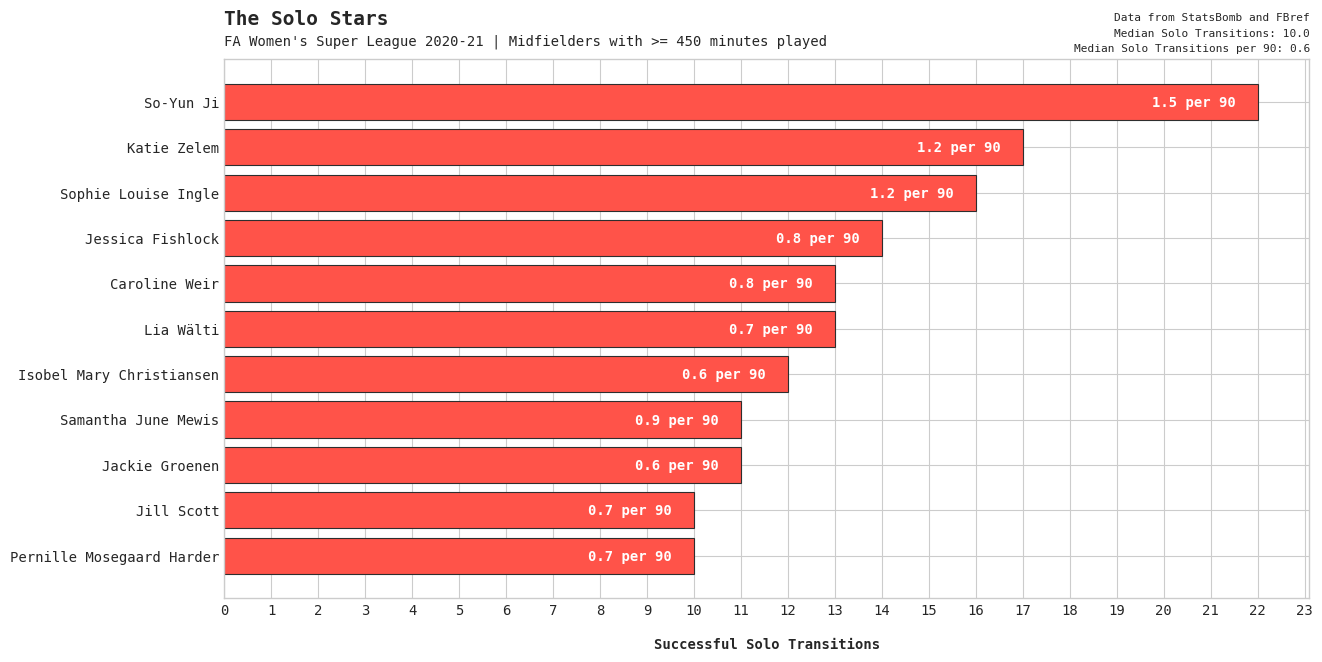

In [138]:
solo_stars = sqldf(
    '''
    SELECT 
        player_id,
        player,
        total_successful_solo_transitions AS successful_solo_transitions,
        total_successful_solo_transitions_p90 AS successful_solo_transitions_p90
    FROM summary
    ORDER BY 3 DESC, 4 DESC, 1
    LIMIT 11
    '''
).sort_values(['successful_solo_transitions', 'successful_solo_transitions_p90'])

plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.barh(solo_stars.player, solo_stars.successful_solo_transitions, color='#FF5349', edgecolor='#2E2E2E', linewidth=0.8)
plt.title(label='The Solo Stars', fontweight='bold', family='monospace', fontsize=14, loc='left', pad=25)
plt.text(x=0, y=11.25, s="FA Women's Super League 2020-21 | Midfielders with >= 450 minutes played", family='monospace', fontsize=10)
plt.text(x=18.95, y=11.8, s="Data from StatsBomb and FBref", family='monospace', fontsize=8)
plt.text(x=18.95, y=11.45, s=f"Median Solo Transitions: {np.percentile(solo_stars.successful_solo_transitions, 0.5)}", family='monospace', fontsize=8)
plt.text(x=18.1, y=11.1, s=f"Median Solo Transitions per 90: {np.percentile(solo_stars.successful_solo_transitions_p90, 0.5)}", family='monospace', fontsize=8)
plt.xticks(np.arange(0, 23 + 1, 1), family='monospace', fontsize=10)
plt.yticks( family='monospace', fontsize=10)
plt.xlabel('Successful Solo Transitions', labelpad=15, fontsize=10, family='monospace', fontweight='bold')
plt.text(x=19.75, y=9.9, s="1.5 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=14.75, y=8.9, s="1.2 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=13.75, y=7.9, s="1.2 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=11.75, y=6.9, s="0.8 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=10.75, y=5.9, s="0.8 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=10.75, y=4.9, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=9.75, y=3.9, s="0.6 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=8.75, y=2.9, s="0.9 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=8.75, y=1.9, s="0.6 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=7.75, y=0.9, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.text(x=7.75, y=-0.1, s="0.7 per 90", family='monospace', fontsize=10, color='white', fontweight='bold')
plt.show()

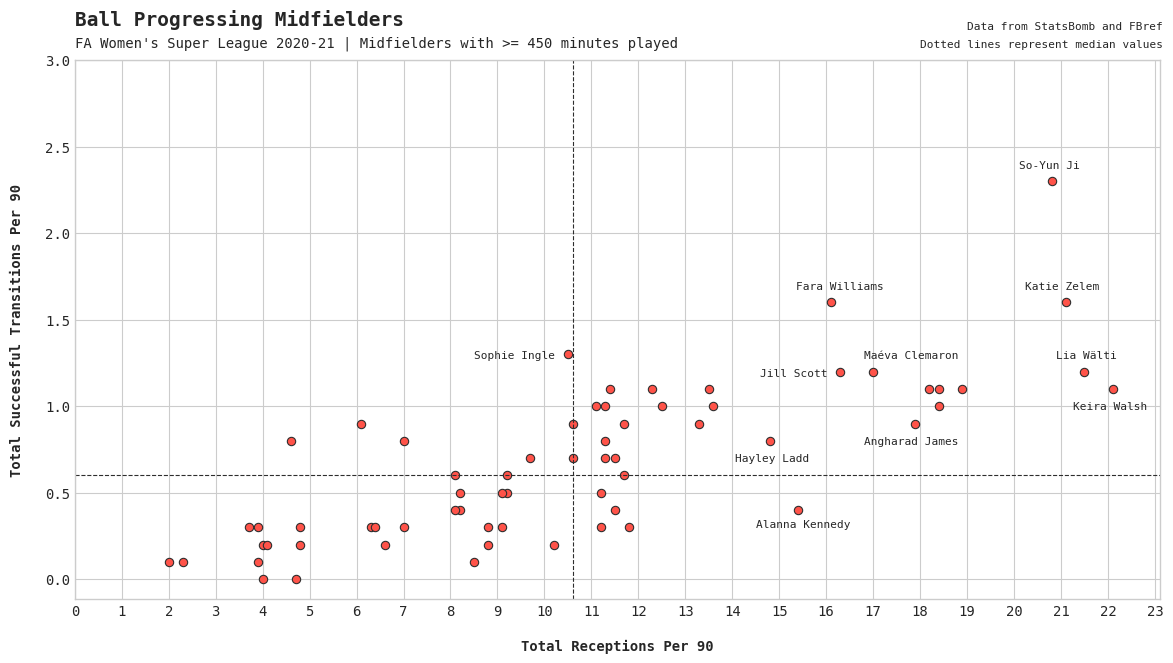

In [32]:
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(x=summary.total_receptions_p90, y=summary.total_successful_transitions_p90, c='#FF5349', edgecolor='#2E2E2E', linewidth=0.8)

plt.title(label='Ball Progressing Midfielders', fontweight='bold', family='monospace', fontsize=14, loc='left', pad=25)
plt.text(x=0, y=3.075, s="FA Women's Super League 2020-21 | Midfielders with >= 450 minutes played", family='monospace', fontsize=10)
plt.text(x=19, y=3.175, s="Data from StatsBomb and FBref", family='monospace', fontsize=8)
plt.text(x=18, y=3.075, s="Dotted lines represent median values", family='monospace', fontsize=8)
plt.xticks(np.arange(0, 23 + 1, 1), family='monospace', fontsize=10)
plt.yticks(np.arange(0, 3.5, 0.5), family='monospace', fontsize=10)
plt.xlabel('Total Receptions Per 90', labelpad=15, fontsize=10, family='monospace', fontweight='bold')
plt.ylabel('Total Successful Transitions Per 90', labelpad=15, fontsize=10, family='monospace', fontweight='bold')
plt.axhline(y=np.percentile(a=summary.total_successful_transitions_p90, q=50), color='#2E2E2E', linestyle='--', linewidth=0.8)
plt.axvline(x=np.percentile(a=summary.total_receptions_p90, q=50), color='#2E2E2E', linestyle='--', linewidth=0.8)
plt.text(x=20.1, y=2.375, s="So-Yun Ji", family='monospace', fontsize=8)
plt.text(x=15.35, y=1.675, s="Fara Williams", family='monospace', fontsize=8)
plt.text(x=20.225, y=1.675, s="Katie Zelem", family='monospace', fontsize=8)
plt.text(x=20.9, y=1.275, s="Lia Wälti", family='monospace', fontsize=8)
plt.text(x=21.25, y=0.98, s="Keira Walsh", family='monospace', fontsize=8)
plt.text(x=8.5, y=1.275, s="Sophie Ingle", family='monospace', fontsize=8)
plt.text(x=14.6, y=1.175, s="Jill Scott", family='monospace', fontsize=8)
plt.text(x=16.8, y=1.275, s="Maéva Clemaron", family='monospace', fontsize=8)
plt.text(x=14.5, y=0.3, s="Alanna Kennedy", family='monospace', fontsize=8)
plt.text(x=14.05, y=0.68, s="Hayley Ladd", family='monospace', fontsize=8)
plt.text(x=16.8, y=0.78, s="Angharad James", family='monospace', fontsize=8)
plt.show()

In [33]:
summary[(summary.total_successful_transitions_p90 < 1) & (summary.total_receptions_p90 > 14) & (summary.total_receptions_p90 < 18)][['player', 'total_receptions_p90', 'total_successful_transitions_p90']]

,player,total_receptions_p90,total_successful_transitions_p90
6,Alanna Stephanie Kennedy,15.4,0.4
26,Angharad James,17.9,0.9
38,Hayley Ladd,14.8,0.8


In [35]:
np.percentile(a=summary.total_successful_solo_transitions_p90, q=50)

0.4

In [36]:
summary.sort_values('total_successful_solo_transitions', ascending=False).head(10)

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played,total_receptions_p90,total_successful_transitions_p90,total_successful_solo_transitions_p90
1,4647,So-Yun Ji,302,33,22,1307,20.8,2.3,1.5
49,31540,Katie Zelem,297,22,17,1268,21.1,1.6,1.2
21,15549,Sophie Louise Ingle,143,18,16,1226,10.5,1.3,1.2
4,5016,Jessica Fishlock,241,20,14,1601,13.5,1.1,0.8
13,10188,Caroline Weir,197,18,13,1440,12.3,1.1,0.8
16,10405,Lia Wälti,375,21,13,1567,21.5,1.2,0.7
0,4645,Isobel Mary Christiansen,392,23,12,1917,18.4,1.1,0.6
8,5087,Samantha June Mewis,145,14,11,1147,11.4,1.1,0.9
18,10654,Jackie Groenen,204,14,11,1627,11.3,0.8,0.6
12,10172,Jill Scott,223,17,10,1235,16.3,1.2,0.7


In [37]:
summary[summary.player == 'Samantha May Kerr']

,player_id,player,total_receptions,total_successful_transitions,total_successful_solo_transitions,minutes_played,total_receptions_p90,total_successful_transitions_p90,total_successful_solo_transitions_p90


In [38]:
events[events.player == 'Samantha May Kerr'].position.value_counts()

position
Center Forward               1124
Left Center Forward           446
Left Wing                     417
Right Wing                    215
Right Center Forward          124
Center Defensive Midfield      70
Name: count, dtype: int64

In [39]:
results[(results.player_id == 4647) & (results.successful_transition == True)]

AttributeError: 'DataFrame' object has no attribute 'successful_transition'

In [40]:
# 3775611	2235	55	2	122
# 3775611	2287	56	32	124
m_id = 3775611
p = 124
events[(events.match_id == m_id) & (events.possession == p)].sort_values('index')


,id,match_id,index,minute,second,possession,possession_team_id,possession_team,type,player_id,...,pass_end_location,pass_outcome,ball_receipt_outcome,pass_recipient_id,pass_recipient,carry_end_location,dribble_outcome,foul_won_advantage,related_events,under_pressure
393206,f701f457-156f-453a-8856-d81ffcb333ba,3775611,2283,56,19,124,971,Chelsea FCW,Ball Recovery,15560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289686,9a77913e-6b17-42ea-99b3-a32ad6ba238b,3775611,2284,56,19,124,971,Chelsea FCW,Carry,15560.0,...,NaN,NaN,NaN,NaN,NaN,"[15.6, 39.1]",NaN,NaN,"[6d4c59e8-856c-46a8-8197-a0f017abeb76, 9ff54b6...",True
354476,9ff54b63-169a-4d63-82ae-4e840e3c7d36,3775611,2285,56,25,124,971,Chelsea FCW,Pressure,10180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[9a77913e-6b17-42ea-99b3-a32ad6ba238b],NaN
71599,6d4c59e8-856c-46a8-8197-a0f017abeb76,3775611,2286,56,29,124,971,Chelsea FCW,Pass,15560.0,...,"[52.4, 33.0]",NaN,NaN,4647.0,So-Yun Ji,NaN,NaN,NaN,[6670d08a-1c66-4d52-b7cc-2673dc8f2cf5],NaN
187325,6670d08a-1c66-4d52-b7cc-2673dc8f2cf5,3775611,2287,56,32,124,971,Chelsea FCW,Ball Receipt*,4647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[6d4c59e8-856c-46a8-8197-a0f017abeb76],NaN
289687,338ae7b0-66e7-4816-8b9c-ad47c9d8e2f6,3775611,2288,56,32,124,971,Chelsea FCW,Carry,4647.0,...,NaN,NaN,NaN,NaN,NaN,"[53.9, 38.4]",NaN,NaN,"[6670d08a-1c66-4d52-b7cc-2673dc8f2cf5, a1aabf2...",NaN
71600,a1aabf27-fc6d-4101-ad72-7ed27144d115,3775611,2289,56,33,124,971,Chelsea FCW,Pass,4647.0,...,"[103.3, 64.9]",NaN,NaN,4641.0,Francesca Kirby,NaN,NaN,NaN,[773e1fdf-9889-4507-b909-4289cf960646],NaN
354477,b877e52c-ae1f-4efc-a948-0c77a42da69a,3775611,2290,56,37,124,971,Chelsea FCW,Pressure,4651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[773e1fdf-9889-4507-b909-4289cf960646, 8147414...",NaN
187326,773e1fdf-9889-4507-b909-4289cf960646,3775611,2291,56,37,124,971,Chelsea FCW,Ball Receipt*,4641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[a1aabf27-fc6d-4101-ad72-7ed27144d115, b877e52...",True
289688,81474142-c3f5-482f-9719-81cfa2420916,3775611,2292,56,37,124,971,Chelsea FCW,Carry,4641.0,...,NaN,NaN,NaN,NaN,NaN,"[105.9, 63.5]",NaN,NaN,"[773e1fdf-9889-4507-b909-4289cf960646, b877e52...",True
